In [1]:
import os
from Bio.SeqIO import QualityIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from DMS_utils import dna_rev_comp, translate_dna2aa
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.colors as mcolors
from scipy import stats
import os.path
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

#from evaluation_functions import *
from importlib import reload
from functions_ import *
from plotting import *

In [2]:
## reload the evaluation functions
import plotting
reload(plotting)
from plotting import *
import functions_
reload(functions_)
from functions_ import *

In [3]:
base_dir = os.getcwd()
R5_Pool_seq = "GGCGCAACTATCGGTATCAAGCTGTTTAAGAAATTCACCTCGAAAGCAAGTTGATAAACTGATACAATTAAAGGCTCCTTTTGGAGCCTTTTTTTTTGGAGTAAGGAGGAAAAATGTCCGAGGAAGCGCAGAACGATCCGCTGCTGCCGGGCTATAGCTTTAACGCGCATCTGGTGGCGGGCCTGACCCCGATTGAAGCGAACGGCTATCTGGATTTTTTTATTGATCGCCCGCTGGGCATGAAAGGCTATATTCTGAACCTGACCATTCGCGGCCAGGGCGTGGTGAAAAACCAGGGCCGCGAATTTGTGTGCCGCCCGGGCGATATTCTGCTGTTTCCGCCGGGCGAAATTCATCATTATGGCCGCCATCCGGAAGCGCGCGAATGGTATCATCAGTGGGTGTATTTTCGCCCGCGCGCGTATTGGCATGAATGGCTGAACTGGCCGAGCATTTTTGCGAACACCGGCTTTTTTCGCCCGGATGAAGCGCATCAGCCGCATTTTAGCGATCTGTTTGGCCAGATTATTAACGCGGGCCAGGGCGAAGGCCGCTATAGCGAACTGCTGGCGATTAACCTGATAGAACAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGCCAGTATATTAGCGATCATCTGGCGGATAGCAACTTTGATATTGCGAGCGTGGCGCAGCATGTGTGCCTGAGCCCGAGCCGCCTGAGCCATCTGTTTCGCCAGCAGCTGGGCATTAGCGTGCTGAGCTGGCGCGAAGATCAGCGCATTAGCCAGGCGAAACTGCTGCTGAGCACCACCCGCATGCCGATTGCGACCGTGGGCCACAACGTGGGCTTTGATGATCAGCTGTATTTTAGCCGCGTGTTTAAAAAATGCACCGGCGCGAGCCCGAGCGAATTTCGCGCGGGCTGCGAAGAAAAAGTGAACGATGTGGCGGTGAAACTGAGCGGGTAAGGCTAATGGAGATTTTCAACATGGGCTAGCACAGCCCTAGGTATTATGCTAGCGTGGTGTCTGCGTAATAAGGAGTCTTAATCATGCCAGTTC"

catch_left = "" #"ACACTCTTTCCCTACACGACGCTCTTCCGATCT" ## Adapter fwd
catch_right = "" #"GACTGGAGTTCAGACGTGTGCTCTTCCGATCT"

Barcodes = {"BC1_fwd": "AAGG",
            "BC1_rev": "ATCA",
            "BC2_fwd": "AGTC",
            "BC2_rev": "GCCG",
            "BC3_fwd": "AGGA",
            "BC3_rev": "AATT",
            "BC4_fwd": "GCGA",
            "BC4_rev": "TGGT",
            "BC5_fwd": "CCAT",
            "BC5_rev": "GACC",
            "BC6_fwd": "CTAG",
            "BC6_rev": "CCAG",
            }
            

S1_fwd_primer = "GGCGCAACTATCGGTATCAAGC"
S1_rev_primer = "TCGGCCAGTTCAGCCATTCA"
S1_rev_primer_compseq = dna_rev_comp(S1_rev_primer)
S2_fwd_primer = "ATTATGGCCGCCATCCGGAAGCG"
S2_rev_primer = "TAGCACGGTCAGTCTCTGGC"
S2_rev_primer_compseq = dna_rev_comp(S2_rev_primer)
S3_fwd_primer = "GTCCGATAGCTTCCTGCAATTAACC"
S3_rev_primer = "ACATGCTGCGCCACGCTC"
S3_rev_primer_compseq = dna_rev_comp(S3_rev_primer)
S4_fwd_primer = "GATAACCGCGTGCGCGAA"
S4_rev_primer = "GAACTGGCATGATTAAGACTCCTTATTACG" 
S4_rev_primer_compseq = dna_rev_comp(S4_rev_primer)

Primer_seq = dict(
            S1_fwd = "GGCGCAACTATCGGTATCAAGC",
            S1_rev = "TCGGCCAGTTCAGCCATTCA",
            S2_fwd = "ATTATGGCCGCCATCCGGAAGCG",
            S2_rev = "TAGCACGGTCAGTCTCTGGC",
            S3_fwd = "GTCCGATAGCTTCCTGCAATTAACC",
            S3_rev = "ACATGCTGCGCCACGCTC",
            S4_fwd = "GATAACCGCGTGCGCGAA",
            S4_rev = "GAACTGGCATGATTAAGACTCCTTATTACG" 
)

genetic_code = {
  'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
  'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
  'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
  'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
  'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
  'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
  'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
  'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
  'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
  'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
  'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
  'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
  'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
  'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
  'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
  'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W',
}

codons = list(genetic_code.keys())

quality_score = {
  '!':0, '"':1, '#':2, '$':3, '%':4, '&':5, "'":6, '(':7, ')':8, '*':9,
  '+':10, ',':11, '-':12, '.':13, '/':14, '0':15, '1':16, '2':17, '3':18, '4':19,
  '5':20, '6':21, '7':22, '8':23, '9':24, ':':25, ';':26, '<':27, '=':28, '>':29,
  '?':30, '@':31, 'A':32, 'B':33, 'C':34, 'D':35, 'E':36, 'F':37, 'G':38, 'H':39, 'I':40
}

Primer_out_of_triplets = {"S1_fwd": 2,
                     "S1_rev": 1, 
                     "S2_fwd": 2,
                     "S2_rev": 1,
                     "S3_fwd": 1,
                     "S3_rev": 2,
                     "S4_fwd": 0,
                     "S4_rev": 3} ##?

# for key in Primer_out_of_triplets.keys():
#     Primer_out_of_triplets[key] =  Primer_out_of_triplets[key] +3

AraC_LOV2_prot = "MSEEAQNDPLLPGYSFNAHLVAGLTPIEANGYLDFFIDRPLGMKGYILNLTIRGQGVVKNQGREFVCRPGDILLFPPGEIHHYGRHPEAREWYHQWVYFRPRAYWHEWLNWPSIFANTGFFRPDEAHQPHFSDLFGQIINAGQGEGRYSELLAINLIEQLLLRRMEAINESSGLATTLERIEKNFVITDPRLPDNPIIFASDSFLQLTEYSREEILGRNCRFLQGPETDRATVRKIRDAIDNQTEVTVQLINYTKSGKKFWNLFHLQPMRDQKGDVQYFIGVQLDGTEHVRDAAEREGVMLIKKTAENIDEAAKGSLHPPMDNRVREACQYISDHLADSNFDIASVAQHVCLSPSRLSHLFRQQLGISVLSWREDQRISQAKLLLSTTRMPIATVGHNVGFDDQLYFSRVFKKCTGASPSEFRAGCEEKVNDVAVKLSG*"

AraC_LOV2_annot = ['M0', 'S1', 'E2', 'E3', 'A4', 'Q5', 'N6', 'D7', 'P8', 'L9', 'L10', 'P11', 'G12', 'Y13', 'S14', 'F15', 'N16', 'A17', 'H18', 'L19', 'V20', 'A21', 'G22', 'L23', 'T24', 'P25', 'I26', 'E27', 'A28', 'N29', 'G30', 'Y31', 'L32', 'D33', 'F34', 'F35', 'I36', 'D37', 'R38', 'P39', 'L40', 'G41', 'M42', 'K43', 'G44', 'Y45', 'I46', 'L47', 'N48', 'L49', 'T50', 'I51', 'R52', 'G53', 'Q54', 'G55', 'V56', 'V57', 'K58', 'N59', 'Q60', 'G61', 'R62', 'E63', 'F64', 'V65', 'C66', 'R67', 'P68', 'G69', 'D70', 'I71', 'L72', 'L73', 'F74', 'P75', 'P76', 'G77', 'E78', 'I79', 'H80', 'H81', 'Y82', 'G83', 'R84', 'H85', 'P86', 'E87', 'A88', 'R89', 'E90', 'W91', 'Y92', 'H93', 'Q94', 'W95', 'V96', 'Y97', 'F98', 'R99', 'P100', 'R101', 'A102', 'Y103', 'W104', 'H105', 'E106', 'W107', 'L108', 'N109', 'W110', 'P111', 'S112', 'I113', 'F114', 'A115', 'N116', 'T117', 'G118', 'F119', 'F120', 'R121', 'P122', 'D123', 'E124', 'A125', 'H126', 'Q127', 'P128', 'H129', 'F130', 'S131', 'D132', 'L133', 'F134', 'G135', 'Q136', 'I137', 'I138', 'N139', 'A140', 'G141', 'Q142', 'G143', 'E144', 'G145', 'R146', 'Y147', 'S148', 'E149', 'L150', 'L151', 'A152', 'I153', 'N154', 'L155', 'I156', 'E157', 'Q158', 'L159', 'L160', 'L161', 'R162', 'R163', 'M164', 'E165', 'A166', 'I167', 'N168', 'E169', 'S170', 'S1', 'G2', 'L404', 'A405', 'T406', 'T407', 'L408', 'E409', 'R410', 'I411', 'E412', 'K413', 'N414', 'F415', 'V416', 'I417', 'T418', 'D419', 'P420', 'R421', 'L422', 'P423', 'D424', 'N425', 'P426', 'I427', 'I428', 'F429', 'A430', 'S431', 'D432', 'S433', 'F434', 'L435', 'Q436', 'L437', 'T438', 'E439', 'Y440', 'S441', 'R442', 'E443', 'E444', 'I445', 'L446', 'G447', 'R448', 'N449', 'C450', 'R451', 'F452', 'L453', 'Q454', 'G455', 'P456', 'E457', 'T458', 'D459', 'R460', 'A461', 'T462', 'V463', 'R464', 'K465', 'I466', 'R467', 'D468', 'A469', 'I470', 'D471', 'N472', 'Q473', 'T474', 'E475', 'V476', 'T477', 'V478', 'Q479', 'L480', 'I481', 'N482', 'Y483', 'T484', 'K485', 'S486', 'G487', 'K488', 'K489', 'F490', 'W491', 'N492', 'L493', 'F494', 'H495', 'L496', 'Q497', 'P498', 'M499', 'R500', 'D501', 'Q502', 'K503', 'G504', 'D505', 'V506', 'Q507', 'Y508', 'F509', 'I510', 'G511', 'V512', 'Q513', 'L514', 'D515', 'G516', 'T517', 'E518', 'H519', 'V520', 'R521', 'D522', 'A523', 'A524', 'E525', 'R526', 'E527', 'G528', 'V529', 'M530', 'L531', 'I532', 'K533', 'K534', 'T535', 'A536', 'E537', 'N538', 'I539', 'D540', 'E541', 'A542', 'A543', 'K544', 'G3', 'S4', 'L171', 'H172', 'P173', 'P174', 'M175', 'D176', 'N177', 'R178', 'V179', 'R180', 'E181', 'A182', 'C183', 'Q184', 'Y185', 'I186', 'S187', 'D188', 'H189', 'L190', 'A191', 'D192', 'S193', 'N194', 'F195', 'D196', 'I197', 'A198', 'S199', 'V200', 'A201', 'Q202', 'H203', 'V204', 'C205', 'L206', 'S207', 'P208', 'S209', 'R210', 'L211', 'S212', 'H213', 'L214', 'F215', 'R216', 'Q217', 'Q218', 'L219', 'G220', 'I221', 'S222', 'V223', 'L224', 'S225', 'W226', 'R227', 'E228', 'D229', 'Q230', 'R231', 'I232', 'S233', 'Q234', 'A235', 'K236', 'L237', 'L238', 'L239', 'S240', 'T241', 'T242', 'R243', 'M244', 'P245', 'I246', 'A247', 'T248', 'V249', 'G250', 'H251', 'N252', 'V253', 'G254', 'F255', 'D256', 'D257', 'Q258', 'L259', 'Y260', 'F261', 'S262', 'R263', 'V264', 'F265', 'K266', 'K267', 'C268', 'T269', 'G270', 'A271', 'S272', 'P273', 'S274', 'E275', 'F276', 'R277', 'A278', 'G279', 'C280', 'E281', 'E282', 'K283', 'V284', 'N285', 'D286', 'V287', 'A288', 'V289', 'K290', 'L291', 'S292', 'G293', '*294']

AraC_LOV2_gene = "ATGTCCGAGGAAGCGCAGAACGATCCGCTGCTGCCGGGCTATAGCTTTAACGCGCATCTGGTGGCGGGCCTGACCCCGATTGAAGCGAACGGCTATCTGGATTTTTTTATTGATCGCCCGCTGGGCATGAAAGGCTATATTCTGAACCTGACCATTCGCGGCCAGGGCGTGGTGAAAAACCAGGGCCGCGAATTTGTGTGCCGCCCGGGCGATATTCTGCTGTTTCCGCCGGGCGAAATTCATCATTATGGCCGCCATCCGGAAGCGCGCGAATGGTATCATCAGTGGGTGTATTTTCGCCCGCGCGCGTATTGGCATGAATGGCTGAACTGGCCGAGCATTTTTGCGAACACCGGCTTTTTTCGCCCGGATGAAGCGCATCAGCCGCATTTTAGCGATCTGTTTGGCCAGATTATTAACGCGGGCCAGGGCGAAGGCCGCTATAGCGAACTGCTGGCGATTAACCTGATAGAACAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGCCAGTATATTAGCGATCATCTGGCGGATAGCAACTTTGATATTGCGAGCGTGGCGCAGCATGTGTGCCTGAGCCCGAGCCGCCTGAGCCATCTGTTTCGCCAGCAGCTGGGCATTAGCGTGCTGAGCTGGCGCGAAGATCAGCGCATTAGCCAGGCGAAACTGCTGCTGAGCACCACCCGCATGCCGATTGCGACCGTGGGCCACAACGTGGGCTTTGATGATCAGCTGTATTTTAGCCGCGTGTTTAAAAAATGCACCGGCGCGAGCCCGAGCGAATTTCGCGCGGGCTGCGAAGAAAAAGTGAACGATGTGGCGGTGAAACTGAGCGGGTAA"

In [4]:
## add numbers of positions to the sequence
R5_Pool_AA = translate_dna2aa(R5_Pool_seq[5:])
AraC_AA_start_pos = 37-1
LOV2_AA_start_pos = 210-1
LOV2_AA_end_pos = 351-1# len 145
AraC_end_pos = 477-1 # len 124

AA_berfore_AraC_start = [R5_Pool_AA[i] for i in range(AraC_AA_start_pos)]
AA_AraC_part1 = [R5_Pool_AA[i]+str(i-AraC_AA_start_pos) for i in range(AraC_AA_start_pos,LOV2_AA_start_pos-2)]
AA_linker1 = [R5_Pool_AA[i]+str(i+1-LOV2_AA_start_pos+2) for i in range(LOV2_AA_start_pos-2,LOV2_AA_start_pos)]
AA_Lov2 = [R5_Pool_AA[i]+str(404+i-LOV2_AA_start_pos) for i in range(LOV2_AA_start_pos,LOV2_AA_end_pos)]
AA_linker2 = [R5_Pool_AA[i]+str(i+1-LOV2_AA_end_pos+2) for i in range(LOV2_AA_end_pos,LOV2_AA_end_pos+2)]
AA_AraC_part2 = [R5_Pool_AA[i]+str((LOV2_AA_start_pos-2-AraC_AA_start_pos)+i-(LOV2_AA_end_pos+2)) for i in range(LOV2_AA_end_pos+2,AraC_end_pos )]
AA_after_AraC = [R5_Pool_AA[i] for i in range(AraC_end_pos,len(R5_Pool_AA))]

R5_Pool_AA_annot = AA_berfore_AraC_start + AA_AraC_part1 + AA_linker1 + AA_Lov2 + AA_linker2 + AA_AraC_part2 + AA_after_AraC

In [5]:
############### add repeated S2 S3 seq data ####################

### make sure to run the second code chunk before this one, since the primer dict could have been updated during analysis of the repeated seq run of S2, S3
remove_read_qualities = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*','+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5']
#remove_read_qualities =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-',] 
#remove_read_qualities =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/']

Primer_out_of_triplets = {"S1_fwd": 2,
                     "S1_rev": 1, 
                     "S2_fwd": 2,
                     "S2_rev": 1,
                     "S3_fwd": 1,
                     "S3_rev": 2,
                     "S4_fwd": 0,
                     "S4_rev": 3} ##?

variant1 = "Cycle2Mutagenesis"
variant1_used_BCs = ["BC1"] #["BC1", "BC2"]

variant2 = "Cycle2NegPos"
variant2_used_BCs = ["BC1", "BC2"]#["BC1", "BC2", "BC3", "BC4"]

variant3 = "Mutagenesis"
variant3_used_BCs = ["BC1", "BC2"]

variant4 = "NegPosSelection"
variant4_used_BCs = ["BC1", "BC2", "BC3", "BC4"]

## variant1
a_seq, b_seq, _, _, a_ids, b_ids= read_sequences(variant = variant1, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)
ref_gene = R5_Pool_seq

Cycle2Mutagenesis_reads, Cycle2Mut_ids_Dict = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant1_used_BCs, Sections = ["S1", "S2", "S3", "S4"], max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,  read_len_treshold=None, Primer_out_of_triplets= Primer_out_of_triplets)#(150, 150)


## variant2
a_seq, b_seq, _, _, a_ids, b_ids = read_sequences(variant = variant2, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

Cycle2NegPosSelection_reads, Cycle2NegPos_ids = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant2_used_BCs, Sections = ["S1", "S2", "S3", "S4"], max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,read_len_treshold= None, Primer_out_of_triplets= Primer_out_of_triplets)


## variant3
a_seq, b_seq, _, _, a_ids, b_ids= read_sequences(variant = variant3, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)
ref_gene = R5_Pool_seq

Mutagenesis_reads, Mut_ids_Dict = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant3_used_BCs, Sections = ["S1", "S2", "S3", "S4"], max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,read_len_treshold= None, Primer_out_of_triplets= Primer_out_of_triplets)#(150, 150)


## variant 4
a_seq, b_seq, _, _, a_ids, b_ids = read_sequences(variant = variant4, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

NegPosSelection_reads, NegPos_ids = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant4_used_BCs, Sections = ["S1", "S2", "S3", "S4"], max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,  read_len_treshold= None, Primer_out_of_triplets= Primer_out_of_triplets)


### names 

Mut_names = {"BC1": "Mut1", 
             "BC2" : "Mut3"}

NegPos_names = {"BC1": "Neg1",
                "BC2": "Pos1", 
                "BC3": "Neg3", 
                "BC4": "Pos3"}

Mut_names_2 = {"BC1": "Mut2"}
NegPos_names_2 = {"BC1": "Neg2",
                "BC2": "Pos2"}

all_reads = {**{Mut_names_2[key[:3]]+"_"+key[4:] : value for key, value in Cycle2Mutagenesis_reads.items()},
            **{NegPos_names_2[key[:3]]+"_"+key[4:] : value for key, value in Cycle2NegPosSelection_reads.items()}, 
            **{Mut_names[key[:3]]+"_"+key[4:] : value for key, value in Mutagenesis_reads.items()},
            **{NegPos_names[key[:3]]+"_"+key[4:] : value for key, value in NegPosSelection_reads.items()}}


############### add repeated S2 S3 seq data ####################

remove_read_qualities = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*','+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5']
#remove_read_qualities =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-']

variant1 ="MutS2S3_2"#"MutS2S3_2"#"S2S3alt3cyclesmut"
variant1_used_BCs = ["BC1", "BC2", "BC3"] 

variant2 ="NegPosS2S3_2" #"NegPosS2S3_2"#"S2S3alt3cyclesNegPos"
variant2_used_BCs = ["BC1", "BC2", "BC3", "BC4", "BC5", "BC6"]

### for repeated seq of S2, S3, different primers were used:

Primer_seq["S2.2_fwd"] = "GCATTTTAGCGATCTGTTTGGCC"
Primer_seq["S3.2_fwd"] = "TTCTGGAATTTATTTCACTTGCAGCC"

Primer_seq["S2.2_rev"] = "TAGCACGGTCAGTCTCTGGC"
Primer_seq["S3.2_rev"] = "ACATGCTGCGCCACGCTC"

Primer_out_of_triplets["S2.2_fwd"] = 1#+3
Primer_out_of_triplets["S3.2_fwd"] = 0#+3

Primer_out_of_triplets["S2.2_rev"] = 1#+3
Primer_out_of_triplets["S3.2_rev"] = 2#+3

Sections = ["S2.2", "S3.2"]

a_seq, b_seq, _, _, a_ids, b_ids= read_sequences(variant = variant1, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

Mutagenesis_reads, Mut_ids_Dict = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant1_used_BCs, Sections =Sections, max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids, filter_for_read_len=False, read_len_treshold=None, Primer_out_of_triplets= Primer_out_of_triplets)#(150, 150)

a_seq, b_seq, _, _, a_ids, b_ids = read_sequences(variant = variant2, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

NegPosSelection_reads, NegPos_ids = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant2_used_BCs, Sections = Sections, max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,  filter_for_read_len=False, read_len_treshold= None, Primer_out_of_triplets= Primer_out_of_triplets) 


Mutagenesis_names = {"BC1": "Mut1", 
                     "BC2": "Mut2",
                     "BC3": "Mut3"}

NegPos_names = {"BC1": "Neg1", 
                "BC2": "Pos1", 
                "BC3": "Neg2", 
                "BC4": "Pos2", 
                "BC5": "Neg3", 
                "BC6": "Pos3"
                  }
           
all_reads = {**all_reads, **{**{Mutagenesis_names[key[:3]]+"_"+key[4:] : value for key, value in Mutagenesis_reads.items()},**{NegPos_names[key[:3]]+"_"+key[4:] : value for key, value in NegPosSelection_reads.items()}}}


################################ add repeated S2 S3 seq data (rep seq 2) #####################

remove_read_qualities = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*','+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5']
#remove_read_qualities =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-']

variant1 ="S2S3alt3cyclesmut"
variant1_used_BCs = ["BC1", "BC2", "BC3"] 

variant2 ="S2S3alt3cyclesNegPos"
variant2_used_BCs = ["BC1", "BC2", "BC3", "BC4", "BC5", "BC6"]

### for repeated seq of S2, S3, different primers were used:

Primer_seq["S2.2.2_fwd"] = Primer_seq["S2.2_fwd"] ## same primers since this is just a repeated run
Primer_seq["S3.2.2_fwd"] = Primer_seq["S3.2_fwd"]

Primer_seq["S2.2.2_rev"] = Primer_seq["S2.2_rev"] 
Primer_seq["S3.2.2_rev"] = Primer_seq["S3.2_rev"] 

Primer_out_of_triplets["S2.2.2_fwd"] = Primer_out_of_triplets["S2.2_fwd"] 
Primer_out_of_triplets["S3.2.2_fwd"] = Primer_out_of_triplets["S3.2_fwd"] 

Primer_out_of_triplets["S2.2.2_rev"] = Primer_out_of_triplets["S2.2_rev"]
Primer_out_of_triplets["S3.2.2_rev"] = Primer_out_of_triplets["S3.2_rev"]

Sections = ["S2.2.2", "S3.2.2"]

a_seq, b_seq, _, _, a_ids, b_ids= read_sequences(variant = variant1, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

Mutagenesis_reads, Mut_ids_Dict = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant1_used_BCs, Sections =Sections, max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids, filter_for_read_len=False, read_len_treshold=None, Primer_out_of_triplets= Primer_out_of_triplets)#(150, 150)

a_seq, b_seq, _, _, a_ids, b_ids = read_sequences(variant = variant2, arbitrary_cutoff_a = False, arbitrary_cutoff_b = False, catch_left=catch_left, catch_right=catch_right, return_qualities_ids=True, quality_score=remove_read_qualities)

NegPosSelection_reads, NegPos_ids = demultiplex_reads(a_seq, b_seq, ref_gene,Barcodes=Barcodes, Primer_seq=Primer_seq, used_Barcodes = variant2_used_BCs, Sections = Sections, max_mismatch_primerseq = 3, filter_for_n_mut = True, n_mut_treshold = 10, a_ids=a_ids, b_ids=b_ids,  filter_for_read_len=False, read_len_treshold= None, Primer_out_of_triplets= Primer_out_of_triplets) 


Mutagenesis_names = {"BC1": "Mut1", 
                     "BC2": "Mut2",
                     "BC3": "Mut3"}

NegPos_names = {"BC1": "Neg1", 
                "BC2": "Pos1", 
                "BC3": "Neg2", 
                "BC4": "Pos2", 
                "BC5": "Neg3", 
                "BC6": "Pos3"
                  }
           
all_reads = {**all_reads, **{**{Mutagenesis_names[key[:3]]+"_"+key[4:] : value for key, value in Mutagenesis_reads.items()},**{NegPos_names[key[:3]]+"_"+key[4:] : value for key, value in NegPosSelection_reads.items()}}}

###########################################
# all_ids = {**all_ids, **{**{variant1+"_"+key : value for key, value in Mut_ids_Dict.items()},**{variant2+"_"+key : value for key, value in NegPos_ids.items()}}}

samples = ["Mut1", "Neg1", "Pos1", "Mut2", "Neg2", "Pos2", "Mut3", "Neg3", "Pos3"]

plt_titles =["Mutagenesis cycle 1", "Negative selection cycle 1", "Positive selection cycle 1", "Mutagenesis cycle 2", "Negative selection cycle 2", "Positive selection cycle 2","Mutagenesis cycle 3", "Negative selection cycle 3", "Positive selection cycle 3"]

Sections = ["S1", "S2","S2.2", "S2.2.2","S3", "S3.2", "S3.2.2", "S4"]

FigFolder = None


total reads 68823
BC1 S1 20365 reads
total forward reads before filtering 17241
total reverse reads before filtering 14826
total forward reads after filtering 12351
total reverse reads after filtering 13359
BC1 S2 25531 reads
total forward reads before filtering 22347
total reverse reads before filtering 18977
total forward reads after filtering 14406
total reverse reads after filtering 16205
BC1 S3 24832 reads
total forward reads before filtering 22841
total reverse reads before filtering 17320
total forward reads after filtering 17371
total reverse reads after filtering 14424
BC1 S4 28318 reads
total forward reads before filtering 27309
total reverse reads before filtering 19086
total forward reads after filtering 21651
total reverse reads after filtering 16788
total reads 62671
BC1 S1 10774 reads
total forward reads before filtering 9497
total reverse reads before filtering 8112
total forward reads after filtering 6248
total reverse reads after filtering 7516
BC1 S2 12022 reads
tota

In [67]:
#### merge enrichment from all sequences from all sections, also exclude the first 10 bases for each section, to exlude error-prone seq regions (start of the seq)
## AA level: 

# data_type = "AA"
# read_dict = all_reads 
# all_AA_enrichments = {}
# ref_gene = R5_Pool_seq

def calc_enrichment_for_all(read_dict,
                            ref_gene,
                            data_type = "AA"):

    all_enrichments = {}
    
    dataType_handler = {"DNA": gather_nt_variants, "Codons": gather_codon_variants, "AA": gather_AA_variants}
    gather_variants = dataType_handler.get(data_type)
    if not gather_variants: 
        print("Data type not found!")
        exit()

    for s_idx, Section in enumerate(Sections):

            ref_section = find_reference_seq(ref_gene=ref_gene,Section = Section, Primer_seq=Primer_seq, Primer_out_of_triplets=Primer_out_of_triplets)

            ref_section = ref_section if data_type != "AA" else translate_dna2aa(ref_section) ### ref of specific sequence

            for idx, sample in enumerate(samples):

                a_seq = read_dict[sample+ f"_{Section}_R1"]
                b_seq = read_dict[sample + f"_{Section}_R2"]

                seq_variants = gather_variants(a_seq=a_seq, b_seq = b_seq, catch_left="", catch_right="", ref=ref_section, use_forward_read=True, use_rev_read=True)

                seq_variants = pd.DataFrame.from_dict(seq_variants, dtype=np.float64)

                coverage_df = pd.DataFrame(seq_variants.sum())

                exclude_len_fwd = len(Primer_seq[Section+"_fwd"]) if data_type == "DNA" else len(Primer_seq[Section+"_fwd"])//3
                exclude_len_rev = len(Primer_seq[Section+"_rev"]) if data_type == "DNA" else len(Primer_seq[Section+"_rev"])//3
                
                ref_sec = ref_section[exclude_len_fwd*3:-exclude_len_rev*3] if data_type == "Codons" else ref_section[exclude_len_fwd:-exclude_len_rev] ### ref with excluded primer regions

                all_enrichments[sample+"_"+Section] = [seq_variants.iloc[:, exclude_len_fwd:-exclude_len_rev], ref_sec] ## add the relative freq of the variants to the dict
                
    return all_enrichments


def combine_enrichment_per_cycle(all_enrichments_dict, 
                                 sample_section_names, 
                                 ref_seq,
                                 cut_start_at = None,# "ATGTCCGAGGAAGCGCAGAACGATC",
                                 cut_end_after = None, # "GTGGCGGTGAAACTGAGCGGGTAA",
                                 data_type = "AA"
                                 ):
    
    combined_enrichments_cycles = {} # for each cycle, combine the enrichments of all sections

    ### cut to AraC and LOV2 regions
    if cut_start_at:
        if data_type == "AA":
            cut_start_at = translate_dna2aa(cut_start_at)
        cut_start_at_pos = ref_seq.index(cut_start_at) if data_type != "Codons" else ref_seq.index(cut_start_at)//3## to account for triplets # -1 to include the cut_start_at position
        print(cut_start_at_pos)
    else: 
        cut_start_at_pos = 0

    if cut_end_after:
        if data_type == "AA":
            cut_end_after = translate_dna2aa(cut_end_after)
        cut_end_after_pos = ref_seq.index(cut_end_after) + len(cut_end_after) if data_type != "Codons" else (ref_seq.index(cut_end_after)+len(cut_end_after))//3 # -1 to include the cut_end_after position
        print(cut_end_after_pos)
    else: 
        cut_end_after_pos = -1

    for sample,sample_sec_names in sample_section_names.items():
        combined_enrichments = pd.DataFrame(index= all_enrichments_dict[sample_sec_names[0]][0].index, columns = list(range(len(ref_seq))) if data_type!= "Codons" else list(range(len(ref_seq)//3 ) ), data = 0, dtype = np.float64) ## create a df with the AA positions as columns])

        for sec_name in sample_sec_names:
            sample_data = all_enrichments_dict[sec_name]
            enrichment = sample_data[0]
            ref = sample_data[1]
            section_start_pos = ref_seq.index(ref) if data_type != "Codons" else ref_seq.index(ref)//3
            section_end_pos = section_start_pos + len(ref) if data_type != "Codons" else section_start_pos +( len(ref)//3)
            ## add to respective positions in the combined enrichment df
            
            combined_enrichments.iloc[:,section_start_pos:section_end_pos] = combined_enrichments.iloc[:,section_start_pos:section_end_pos] + enrichment.values
            
        
        combined_enrichments_cycles[sample] = {"coverage": pd.DataFrame(combined_enrichments.sum(axis=0)).T.iloc[:,cut_start_at_pos:cut_end_after_pos], "raw_enrichment" : combined_enrichments.iloc[:,cut_start_at_pos:cut_end_after_pos]}
        
        
        combined_enrichments_counts , combined_enrichments_relative_freq  = mask_ref_in_variants_df(ref_seq=ref_seq, variant_df=combined_enrichments, data_type=data_type)
        combined_enrichments_cycles[sample] = {**combined_enrichments_cycles[sample], "mut_enrichment": [combined_enrichments_counts.iloc[:,cut_start_at_pos:cut_end_after_pos], combined_enrichments_relative_freq.iloc[:,cut_start_at_pos:cut_end_after_pos]]}

    return combined_enrichments_cycles

In [36]:
sample_section = {}
for sample in samples: 
    sample_section[sample] = [sample + "_"+Section for Section in Sections]

AraC_start_pos = "ATGTCCGAGGAAGCGCAGAACGATC"
AraC_end_pos = "GTGGCGGTGAAACTGAGCGGGTAA"

all_enrichments = calc_enrichment_for_all(read_dict=all_reads, ref_gene=R5_Pool_seq, data_type = "AA")
combined_enrichments_per_cycle = combine_enrichment_per_cycle(all_enrichments_dict=all_enrichments, sample_section_names=sample_section, ref_seq=R5_Pool_AA, cut_start_at=AraC_start_pos, cut_end_after=AraC_end_pos, data_type="AA")

36
476


In [45]:
sample_section = {}
for sample in samples: 
    sample_section[sample] = [sample + "_"+Section for Section in Sections]

AraC_start_pos = "ATGTCCGAGGAAGCGCAGAACGATC"
AraC_end_pos = "GTGGCGGTGAAACTGAGCGGGTAA"

all_DNA_enrichments = calc_enrichment_for_all(read_dict=all_reads, ref_gene=R5_Pool_seq, data_type = "DNA")
combined_DNA_enrichments_per_cycle = combine_enrichment_per_cycle(all_enrichments_dict=all_DNA_enrichments, sample_section_names=sample_section, ref_seq=R5_Pool_seq, cut_start_at=AraC_start_pos, cut_end_after=AraC_end_pos, data_type="DNA")

113
1433


In [68]:
sample_section = {}
for sample in samples: 
    sample_section[sample] = [sample + "_"+Section for Section in Sections]

AraC_start_pos = "ATGTCCGAGGAAGCGCAGAACGATC"
AraC_end_pos = "GTGGCGGTGAAACTGAGCGGGTAA"

all_Codon_enrichments = calc_enrichment_for_all(read_dict=all_reads, ref_gene=R5_Pool_seq, data_type = "Codons")
combined_Codon_enrichments_per_cycle = combine_enrichment_per_cycle(all_enrichments_dict=all_Codon_enrichments, sample_section_names=sample_section, ref_seq=R5_Pool_seq[2:], cut_start_at=AraC_start_pos, cut_end_after=AraC_end_pos, data_type="Codons")

37
477


In [70]:

cov_filter_treshold = 50
mut_rate_filter_treshold = 0.03

high_mut_positions = []
low_cov_positions = []

for cycles, sample_data in combined_Codon_enrichments_per_cycle.items():
    variant_relative_freq = pd.DataFrame(sample_data["mut_enrichment"][1].sum(axis=0)).T

    coverages = sample_data["coverage"]
    ## find pos with high mutation rate and low coverage
    low_cov_pos = [idx for idx, cov in enumerate(coverages.values[0]) if cov < cov_filter_treshold]
    high_mut_pos = [idx for idx, mut_rate in enumerate(variant_relative_freq.values[0]) if mut_rate > mut_rate_filter_treshold]

    low_cov_positions.extend(low_cov_pos)
    high_mut_positions.extend(high_mut_pos)


## order dict values
all_high_mut_positions = list(sorted(set([idx for idx in high_mut_positions if idx not in low_cov_positions])))

In [8]:
def plot_enrichmenet_from_comb_Dfs( enrichment_df_dict, 
                                    ref,
                                    combine_mut_rates = True,
                                    color_above_vmax_orange = True,
                                    vmax = 0.1,
                                    show_cbar_for_each = False,
                                    plt_titles = None,
                                    show_plttitles = False,
                                    plot_coverage = True,
                                    bias_per_pos = None,
                                    show_only_pos = None,
                                    ref_annot = None,
                                    return_df = True,
                                    FigFolder = None,
                                    figsize = (20,10),
                                    data_type = "AA"):

    if return_df: 
        combined_df = pd.DataFrame(index = (enrichment_df_dict.keys()), columns = list(range(len(ref))), data = 0, dtype = np.float64)

    pltsize = len(enrichment_df_dict.keys()) if not plot_coverage else len(enrichment_df_dict.keys()) + 1
    pltsize = pltsize + 1 if bias_per_pos else pltsize

    fig, axes =  plt.subplots(pltsize,1, figsize=figsize)
    fig.subplots_adjust(hspace=0.5 if show_plttitles else 0.1)

    if not show_plttitles:
        ## move the last subplot a bit down to make space for the labels    
        last_ax = axes[-1] if not bias_per_pos else axes[-2]         # Get the last subplot
        # Adjust the last subplot's position
        pos = last_ax.get_position()    # Get its current position
        last_ax.set_position([pos.x0, pos.y0 - 0.015, pos.width, pos.height]) 
        if bias_per_pos:
            pos =  axes[-1].get_position()    # Get its current position
            axes[-1].set_position([pos.x0, pos.y0 - 0.015, pos.width, pos.height]) 



    idx = 0 

    my_cmap = plt.get_cmap('viridis').copy()

    if color_above_vmax_orange:
        my_cmap.set_over('orange')

    for cycles, sample_data in enrichment_df_dict.items():
        if combine_mut_rates:
            variant_relative_freq = pd.DataFrame(sample_data["mut_enrichment"][1].sum(axis=0)).T
        else: 
            variant_relative_freq = sample_data["mut_enrichment"][1]

        if return_df:
            combined_df.loc[cycles] = variant_relative_freq.values[0]

        coverage = sample_data["coverage"]

        if show_only_pos:
            variant_relative_freq = variant_relative_freq.iloc[:,show_only_pos]
            coverage = coverage.iloc[:,show_only_pos]

        sns.heatmap(variant_relative_freq, annot=False, ax=axes[idx], linecolor="black", cmap=my_cmap,  cbar_kws={'label': "mutation rate", "pad": 0.02}, vmin=0,vmax = vmax, xticklabels=False if idx != len(enrichment_df_dict.keys())-1 else True, yticklabels=True if combine_mut_rates == False else False, cbar=show_cbar_for_each )

        for _, spine in axes[idx].spines.items():
            spine.set_visible(True)
            spine.set_linewidth(2)
        axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=1, fontsize=5)
        
        if show_plttitles: 
            axes[idx].set_title(plt_titles[idx], fontsize=10)
        
        axes[idx].set_facecolor('gray')
        axes[idx].grid(False)

        labels = ref if not ref_annot else ref_annot
        ref_labels = [aa for aa in ref] if not show_only_pos else [labels[i] for i in show_only_pos]

        if idx == len(enrichment_df_dict.keys())-1:
            axes[idx].set_xticklabels(ref_labels, rotation=1, fontsize=4 if not show_only_pos else 10)
        
        idx += 1

    if plot_coverage:
        sns.heatmap(pd.DataFrame(coverage), ax=axes[pltsize-1],square=False, cbar_kws={'label': f"coverage pos selection c3", "pad": 0.02}, vmin=0, yticklabels=False, xticklabels=False, vmax=500, cbar=show_cbar_for_each)
        
    if bias_per_pos:
        spec_cmap = sns.light_palette("black", n_colors=30, reverse=False, as_cmap=True)
        vmin_bias = min(bias_per_pos)
        vmax_bias = max(bias_per_pos)

        if show_only_pos:
            bias_per_pos = [bias_per_pos[pos] for pos in show_only_pos] ## filter to pos of interest


        sns.heatmap(pd.DataFrame(bias_per_pos).T, ax=axes[pltsize-2], cmap=spec_cmap, square=False, cbar_kws={'label': "chance of codon mutation", "pad": 0.02}, yticklabels=False, xticklabels=False, cbar=show_cbar_for_each, vmin=vmin_bias, vmax=vmax_bias)

        
    if not show_cbar_for_each:
        if not vmax: 
            print("Please set vmax to show one colorbar for all")
            exit()
        ## add at the bottom of the figure horizontally a cbar for the relative counts
        cbar_ax = fig.add_axes([0.13, 0.05, 0.15, 0.02])
        cbar = fig.colorbar(axes[0].collections[0], cax=cbar_ax, orientation = "horizontal")
        cbar.set_label("mutation rate", fontsize = 15)
        cbar.ax.tick_params(labelsize=10)

        ## add cbar also for coverage and biases
        if plot_coverage:
            cbar_ax = fig.add_axes([0.32, 0.05, 0.15, 0.02])
            cbar = fig.colorbar(axes[pltsize-1].collections[0], cax=cbar_ax, orientation = "horizontal")
            cbar.set_label('read depth', fontsize = 15)
            cbar.ax.tick_params(labelsize=10)

        if bias_per_pos: 
            cbar_ax = fig.add_axes([0.51, 0.05, 0.15, 0.02])
            cbar = fig.colorbar(axes[pltsize-2].collections[0], cax=cbar_ax, orientation = "horizontal")
            cbar.set_label('chance of codon mutation', fontsize = 15)
            cbar.ax.tick_params(labelsize=10)

    if FigFolder:
        if not os.path.exists(FigFolder):
            os.makedirs(FigFolder)
        
        dattype = data_type if not combine_mut_rates else "combined" + data_type
        name = f"PANCE_mut_enrichment_all_sections_{dattype}.pdf" if not show_only_pos else f"PANCE_mut_enrichment_all_sections_high_mut_pos_{dattype}.pdf"

        plt.savefig(os.path.join(FigFolder, name), dpi=300)

    if return_df:
        if show_only_pos:
            combined_df = combined_df.iloc[:,show_only_pos]
            if ref_annot:
                combined_df.columns = [ref_annot[i] for i in show_only_pos]
        return combined_df

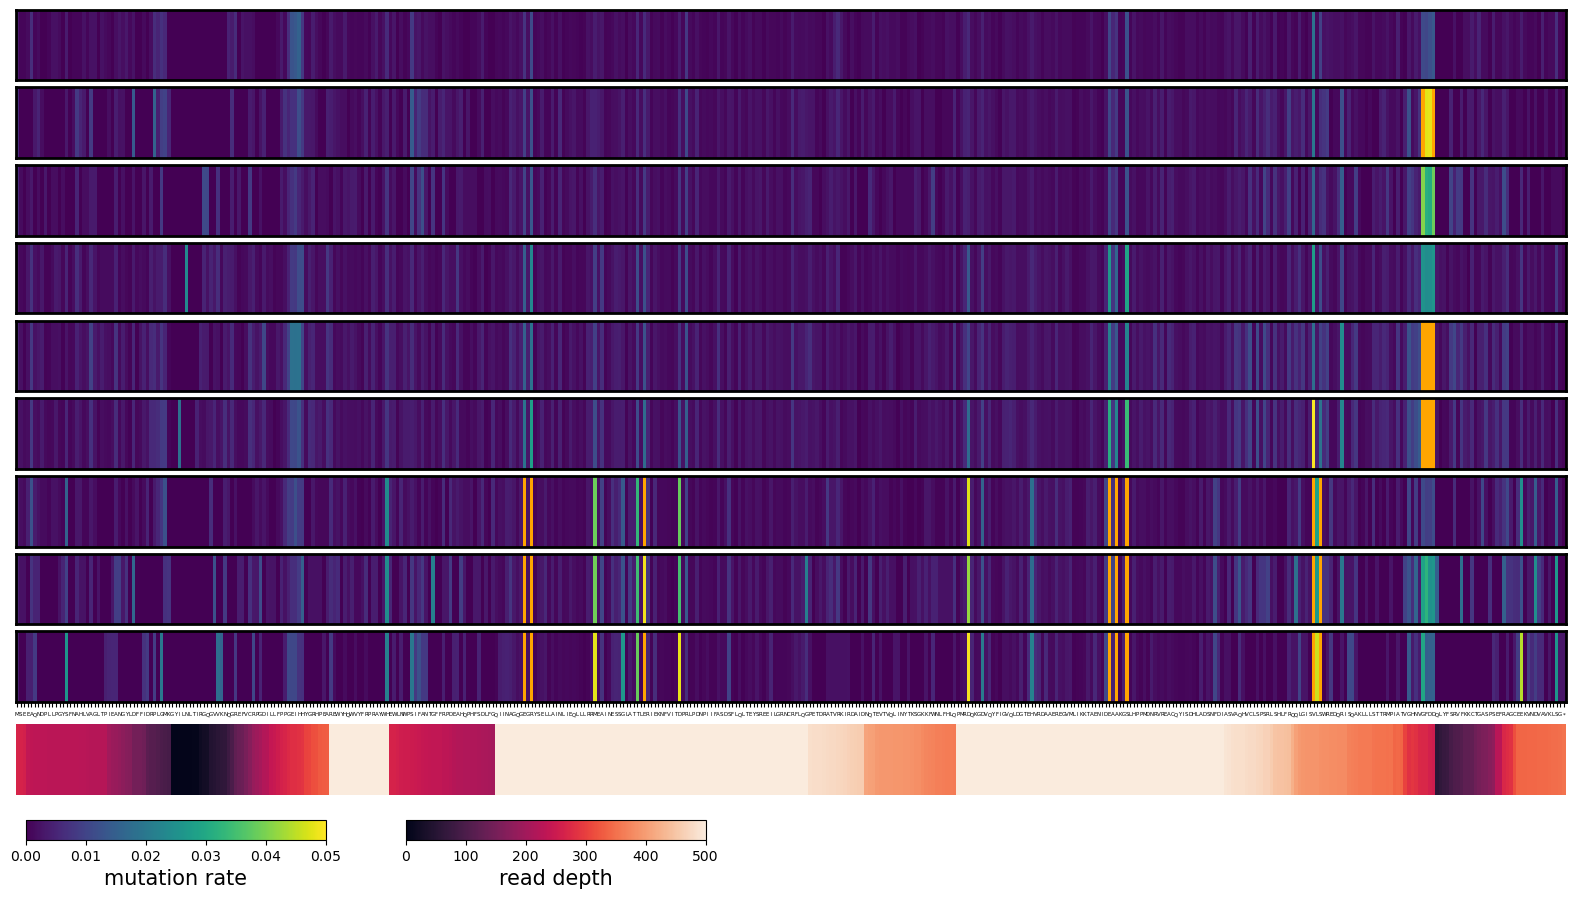

In [92]:
FigFolder = None#os.path.join(os.getcwd(), "output/PACE/final_plots/")
enrichment_values =plot_enrichmenet_from_comb_Dfs(enrichment_df_dict= combined_enrichments_per_cycle,ref = AraC_LOV2_prot,show_only_pos=None,bias_per_pos=None, ref_annot=None, plt_titles=plt_titles, FigFolder=FigFolder, vmax = 0.05, combine_mut_rates=True, return_df=False, data_type="AA")# figsize =(10,10)

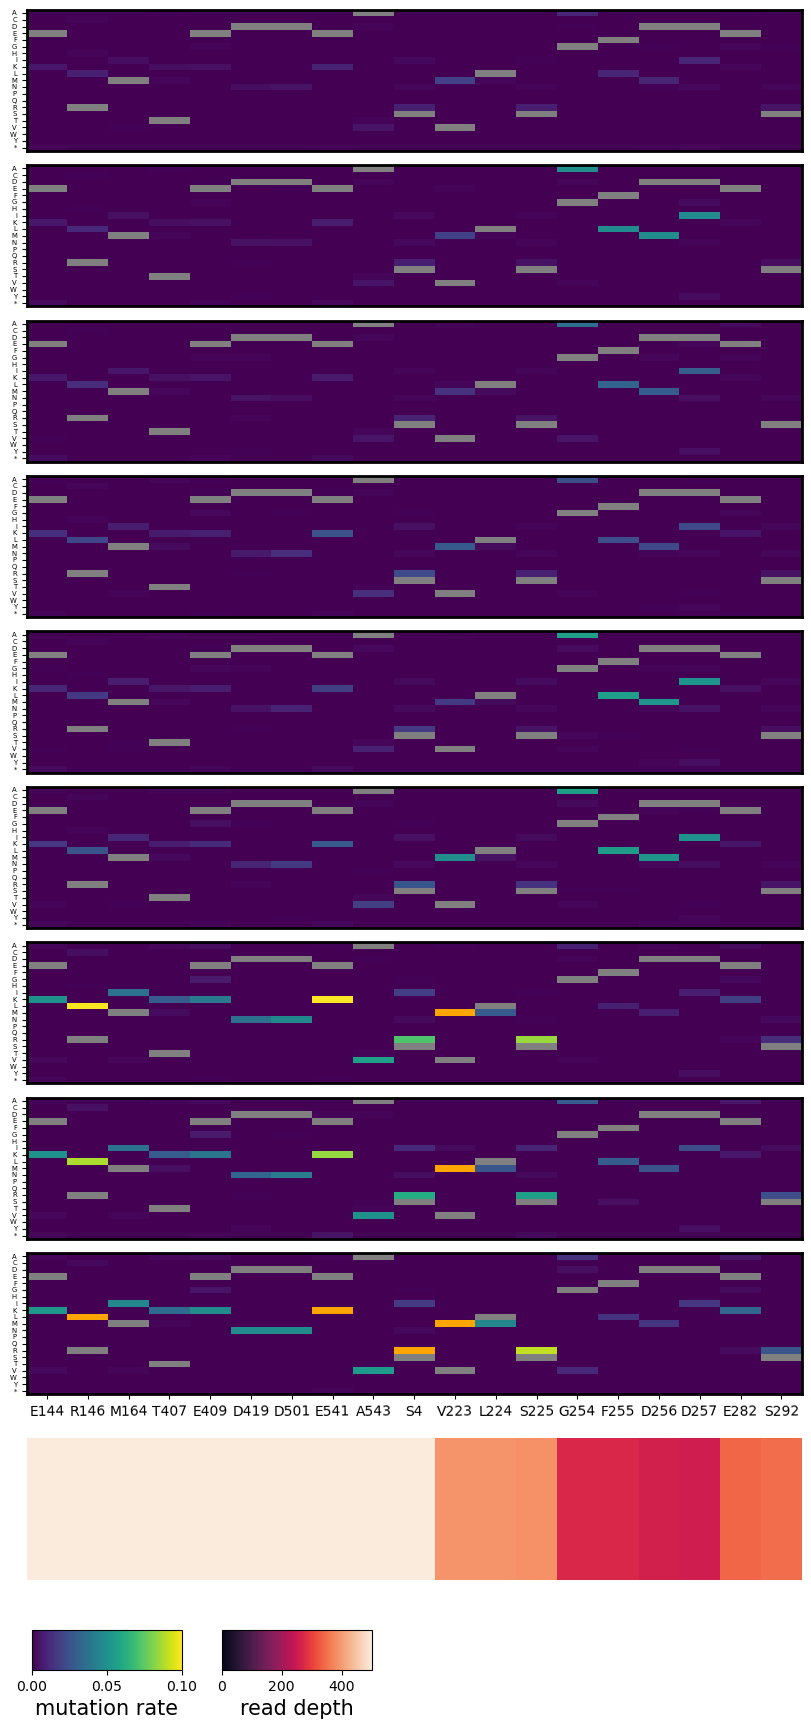

In [94]:
FigFolder = os.path.join(os.getcwd(), "output/PACE/final_plots/")
enrichment_values =plot_enrichmenet_from_comb_Dfs(enrichment_df_dict= combined_enrichments_per_cycle,ref = AraC_LOV2_prot,show_only_pos=all_high_mut_positions, ref_annot=AraC_LOV2_annot, plt_titles=plt_titles, FigFolder=FigFolder, vmax = 0.1, combine_mut_rates=False, figsize =(10,20), data_type="AA")# figsize =(10,10)

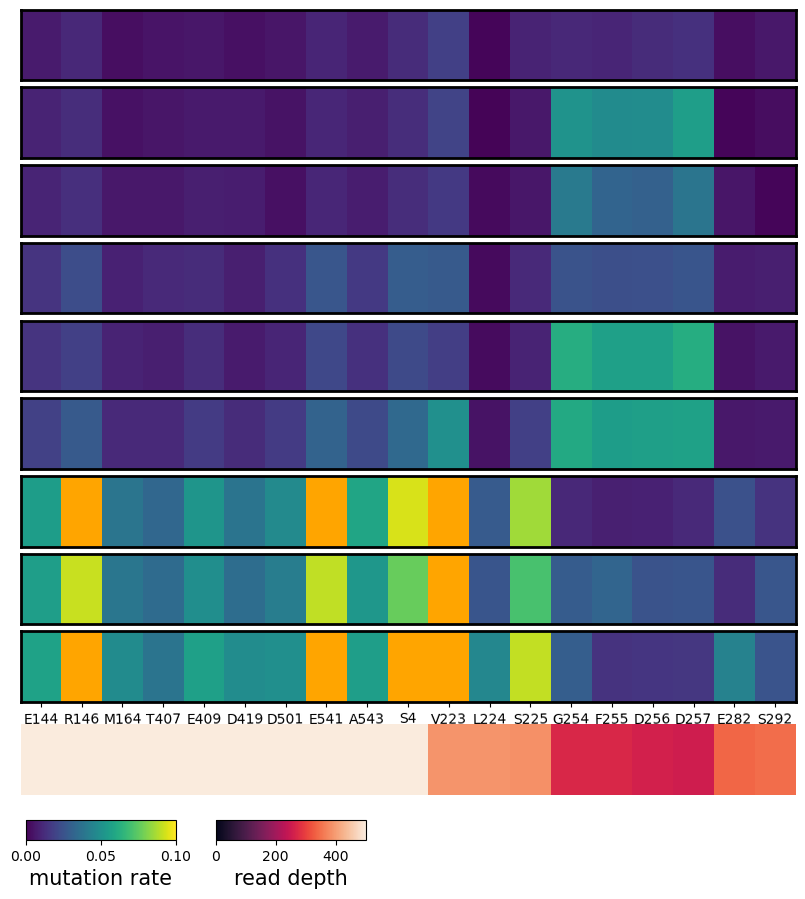

In [95]:
FigFolder = os.path.join(os.getcwd(), "output/PACE/final_plots/")
enrichment_values =plot_enrichmenet_from_comb_Dfs(enrichment_df_dict= combined_enrichments_per_cycle,ref = AraC_LOV2_prot ,show_only_pos=all_high_mut_positions, ref_annot=AraC_LOV2_annot, plt_titles=plt_titles, FigFolder=FigFolder, vmax = 0.1, combine_mut_rates=True, figsize =(10,10), data_type="AA")# figsize =(10,10)

In [73]:
## normalize such that max per col = 1 
enrichment_norm = enrichment_values/enrichment_values.max(axis=0)
enrichment_norm

,E144,R146,M164,T407,E409,D419,D501,E541,A543,S4,V223,L224,S225,G254,F255,D256,D257,E282,S292
Mut1,0.128422,0.082532,0.078532,0.161666,0.109394,0.099701,0.131688,0.102231,0.138059,0.101977,0.048156,0.028103,0.108597,0.177565,0.194993,0.225742,0.231808,0.086005,0.282357
Neg1,0.164991,0.096854,0.094808,0.172848,0.120579,0.150825,0.123938,0.104220,0.157795,0.103613,0.054872,0.045545,0.080669,0.806840,0.844129,0.876862,0.894575,0.055433,0.110367
Pos1,0.182546,0.105735,0.137153,0.174981,0.159985,0.178327,0.101215,0.106301,0.147720,0.105657,0.039067,0.050970,0.064972,0.667466,0.561598,0.538492,0.626009,0.127307,0.085243
Mut2,0.262666,0.176106,0.189408,0.326038,0.222916,0.205686,0.299924,0.264804,0.299706,0.229898,0.069524,0.079288,0.133691,0.427270,0.430589,0.433710,0.425295,0.199033,0.302632
Neg2,0.264059,0.145861,0.196955,0.240927,0.217087,0.168194,0.237307,0.213297,0.252566,0.185503,0.047610,0.103900,0.108345,1.000000,1.000000,1.000000,1.000000,0.108111,0.250967
Pos2,0.336248,0.211334,0.240724,0.311644,0.313508,0.275050,0.370637,0.302797,0.390749,0.257394,0.123929,0.169072,0.210215,0.961321,0.980434,0.992024,0.929253,0.146585,0.220889
Mut3,0.966346,0.752484,0.808498,0.887346,0.942663,0.804556,0.975559,0.962224,1.000000,0.710764,0.747083,0.690148,0.936790,0.172170,0.174143,0.182268,0.188322,0.585586,0.523217
Neg3,0.971765,0.669132,0.816610,0.918586,0.880020,0.733588,0.853034,0.863430,0.898044,0.586194,0.614318,0.673728,0.784434,0.564705,0.572230,0.449108,0.427615,0.279917,0.840032
Pos3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.935977,1.000000,1.000000,1.000000,1.000000,0.465149,0.261860,0.271439,0.252976,1.000000,1.000000


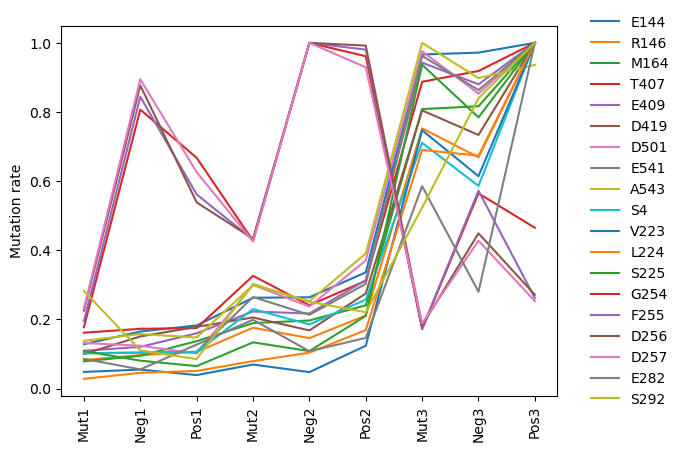

In [74]:
plt.plot(enrichment_norm)
plt.xticks( rotation = 90)
plt.ylabel("Mutation rate")
#plt.ylim(0,0.15)
plt.legend(labels = enrichment_norm.columns, frameon = False, loc = "right", bbox_to_anchor=(1.25, 0.5))
#plt.savefig(os.path.join(base_dir, "output/PACE/cycle_mut_enrichment/cycle_mut_enrichment_wC2/mut_enrichment_pattern_line_plot.pdf"))
plt.show()

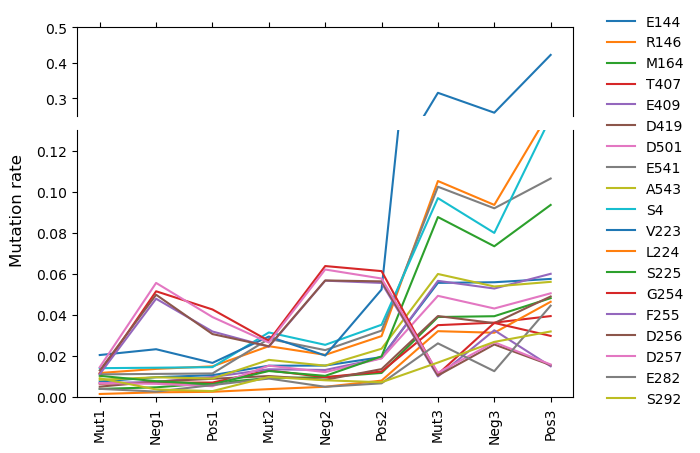

In [75]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1, 3]})
ax.plot(enrichment_values)#(most_enriched_regions.loc[:,  show_pos])
ax2.plot(enrichment_values)#(most_enriched_regions.loc[:,  show_pos])
ax.set_ylim(0.25, 0.5)  # most of the data
ax2.set_ylim(0, 0.13)  # outliers only

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top

# Adjust layout to ensure clean spacing
plt.subplots_adjust(hspace=0.08)

# Set up the labels and show the plot
plt.legend(labels = enrichment_values.columns, frameon = False, loc = "right", bbox_to_anchor=(1.25, 0.7))
plt.xticks(rotation=90)
f.supylabel("Mutation rate")
plt.show()

In [61]:
### calculate mutagenic spectrum from enrichment dataframes 

def calc_mut_spectrum_from_enrichment(enrichment_df, ref_seq):

    mut_spectrum = pd.DataFrame(index = ["A", "C", "G", "T"], columns = ["A", "C", "G", "T"], data = 0, dtype = np.float64) ## rows = reference, cols = mutated

    for idx, ref_nt in enumerate(ref_seq): 
        for mut_nt in ["A", "C", "G", "T"]:
            mut_pos = enrichment_df.iloc[:,idx]
            mut_count = mut_pos[mut_nt]
            #print(mut_count)
            mut_spectrum.loc[ref_nt, mut_nt] += mut_count
            
    return mut_spectrum


In [62]:
combined_DNA_enrichments_per_cycle["Mut1"]["raw_enrichment"].iloc[:,600:1000]

,713,714,715,716,717,718,719,720,721,722,...,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112
A,4.0,7.0,2.0,15.0,43266.0,5.0,43275.0,27.0,55.0,2.0,...,3.0,50660.0,2.0,50806.0,1.0,2.0,50857.0,22.0,31.0,27.0
T,43589.0,2.0,8.0,5.0,1.0,43187.0,6.0,18.0,51.0,43069.0,...,51131.0,3.0,50559.0,0.0,50755.0,50730.0,0.0,6.0,35.0,25.0
G,2.0,0.0,1.0,43721.0,10.0,0.0,5.0,43161.0,0.0,0.0,...,0.0,10.0,3.0,5.0,2.0,3.0,12.0,50663.0,4.0,50618.0
C,17.0,43556.0,43520.0,2.0,0.0,7.0,0.0,0.0,42956.0,14.0,...,4.0,3.0,5.0,2.0,11.0,12.0,6.0,1.0,50561.0,2.0


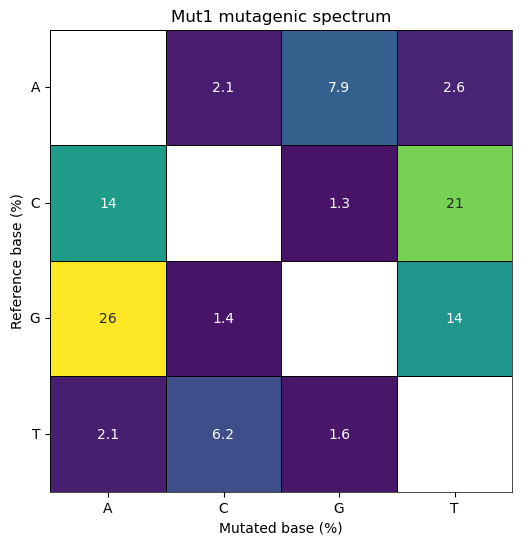

<Figure size 640x480 with 0 Axes>

In [63]:
mut_spec = calc_mut_spectrum_from_enrichment(enrichment_df=combined_DNA_enrichments_per_cycle["Mut1"]["raw_enrichment"],ref_seq=AraC_LOV2_gene)

mut_spec_woDiag = mut_spec.copy()
np.fill_diagonal(mut_spec_woDiag.values, np.nan)
plot_mutation_spectrum(mut_spec_woDiag/mut_spec_woDiag.sum().sum()*100, "Mut1", FigFolder=FigFolder)
## set diag to NA
#np.fill_diagonal(mut_spec.values, np.nan)

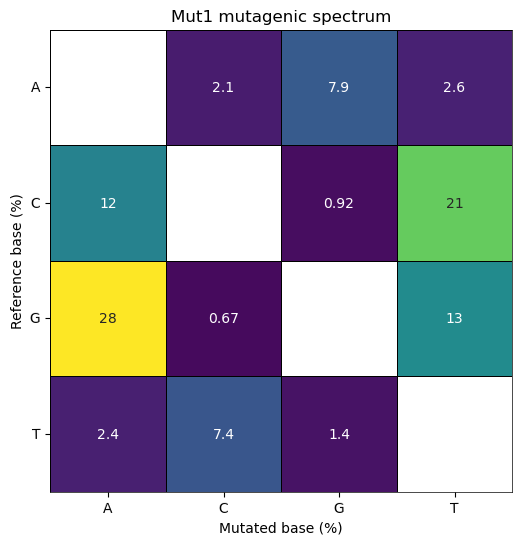

<Figure size 640x480 with 0 Axes>

In [108]:
mut_spec = calc_mut_spectrum_from_enrichment(enrichment_df=combined_DNA_enrichments_per_cycle["Mut1"]["raw_enrichment"].iloc[:,600:900], ref_seq=AraC_LOV2_gene[600:900])

mut_spec_woDiag = mut_spec.copy()
mut_spec_woDiag = mut_spec_woDiag.loc[["A", "G", "C", "T"], ["A", "G", "C", "T"]] 

np.fill_diagonal(mut_spec_woDiag.values, np.nan)
plot_mutation_spectrum(mut_spec_woDiag/mut_spec_woDiag.sum().sum()*100, "Mut1", FigFolder=FigFolder)
## set diag to NA
#np.fill_diagonal(mut_spec.values, np.nan)

In [76]:
### calculate the chance of mutation per Codon based on the mutagenic spectrum ###

## calculate the probability of (no) change happening (row wise, i.e. given a reference base, what is the chance of a conversion to each other nt or no conversion)
overall_mut_spectrum_freq = mut_spec/mut_spec.sum(axis = 1)

## calculate the chance of no mutation happening for each base (i.e. max of every row, since this is the most likely event)
chance_of_no_mut = overall_mut_spectrum_freq.max(axis = 1)

## chance of no mutation per nt within our region of interest
chance_of_no_mut_pos = [chance_of_no_mut[nt] for nt in AraC_LOV2_gene]

## codon-wise chance of mutation (1- chance of no mutation for each nt in the codon)
chance_of_mut_codon_pos = [1-(chance_of_no_mut_pos[pos]*chance_of_no_mut_pos[pos+1]*chance_of_no_mut_pos[pos+2]) for pos in range(0, len(chance_of_no_mut_pos), 3)]

In [65]:
overall_mut_spectrum_freq

,A,C,G,T
A,0.999603,0.000070,0.000237,0.000091
C,0.000450,0.998777,0.000040,0.000726
G,0.000823,0.000047,0.998768,0.000474
T,0.000068,0.000207,0.000047,0.999655


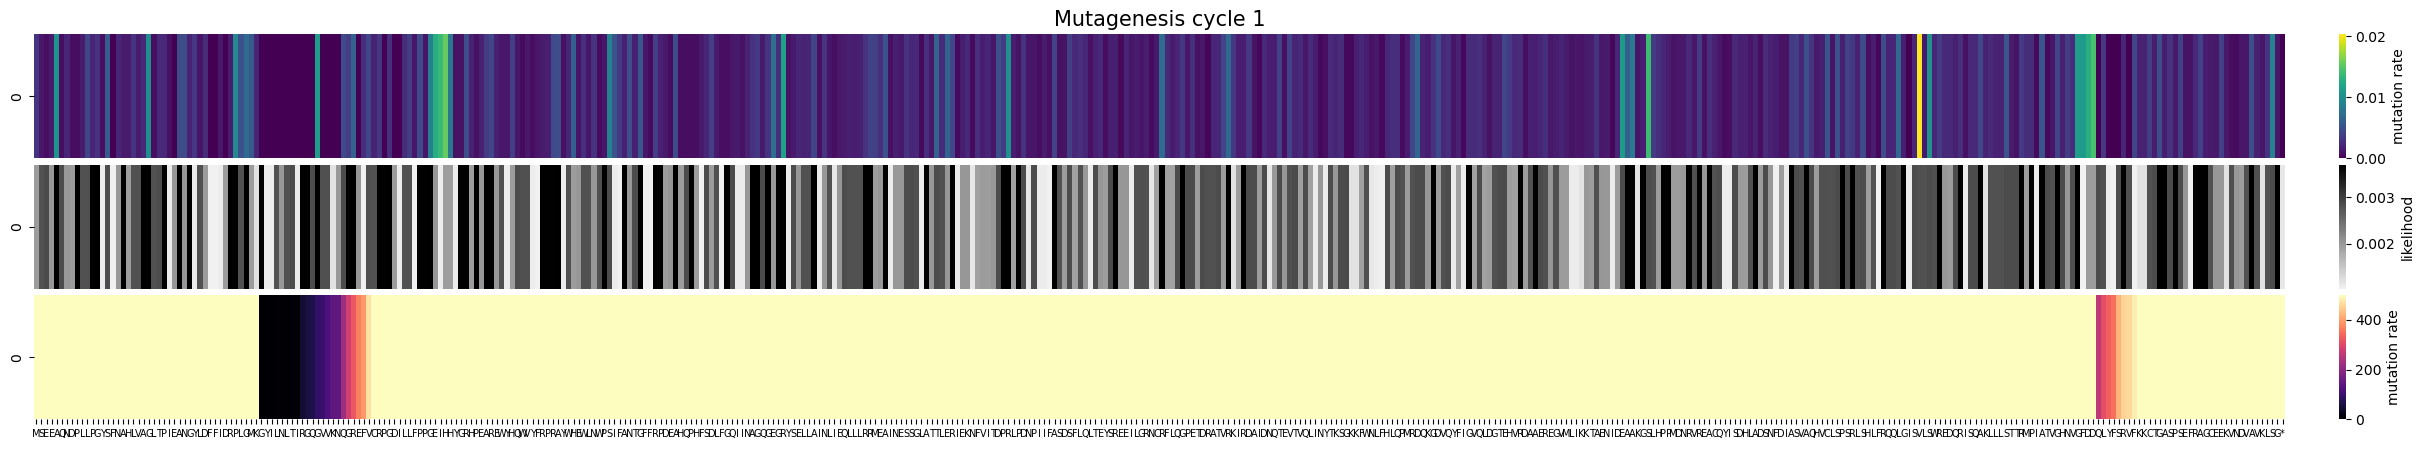

In [85]:
fig,axis = plt.subplots(3,1, figsize=(35,5))
fig.subplots_adjust(hspace=0.05)
sns.heatmap(pd.DataFrame(combined_Codon_enrichments_per_cycle["Mut1"]["mut_enrichment"][1].sum(axis = 0)).T, ax=axis[0], cmap="viridis", cbar_kws={'label': "mutation rate", "pad": 0.02},xticklabels=False)
spec_cmap = sns.light_palette("black", n_colors=30, reverse=False, as_cmap=True)
vmin_bias = min(chance_of_mut_codon_pos)
vmax_bias = max(chance_of_mut_codon_pos)
sns.heatmap(pd.DataFrame(chance_of_mut_codon_pos).T, ax=axis[1], cmap=spec_cmap, cbar_kws={'label': "likelihood", "pad": 0.02}, xticklabels=False)
sns.heatmap(pd.DataFrame(combined_Codon_enrichments_per_cycle["Mut1"]["coverage"]), ax=axis[2], cbar_kws={'label': "mutation rate", "pad": 0.02}, vmin=0, vmax=500, cmap= "magma", xticklabels=AraC_LOV2_prot)
axis[-1].set_xticklabels(AraC_LOV2_prot, rotation=0, fontsize=7)
axis[0].set_title("Mutagenesis cycle 1", fontsize=15)
plt.show()

Text(0, 0.5, 'chance of codon mutation')

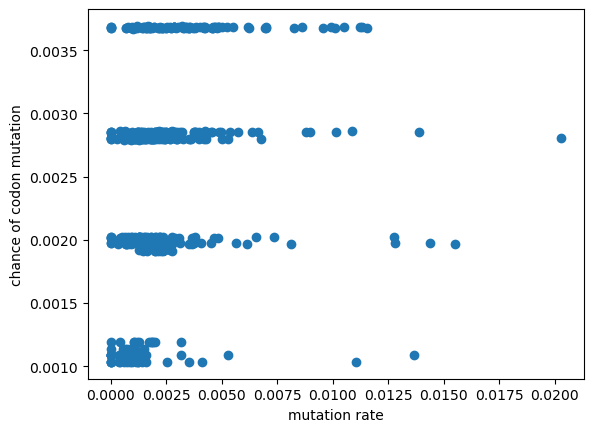

In [78]:
plt.scatter(combined_Codon_enrichments_per_cycle["Mut1"]["mut_enrichment"][1].sum(axis = 0),chance_of_mut_codon_pos)
plt.xlabel("mutation rate")
plt.ylabel("chance of codon mutation")

In [79]:
import scipy as sc
sc.stats.spearmanr(combined_Codon_enrichments_per_cycle["Mut1"]["mut_enrichment"][1].sum(axis = 0),chance_of_mut_codon_pos)

SignificanceResult(statistic=np.float64(0.41376894709351647), pvalue=np.float64(1.2574556628128458e-19))

In [129]:
total_occurrence_of_AAs = combined_AA_enrichments_cycles["Mut1"]["mut_enrichment"][1].sum(axis = 1)

total_occurrence_of_AAs = pd.DataFrame(total_occurrence_of_AAs)
total_occurrence_of_AAs.columns =[ "count"]
total_occurrence_of_AAs.loc[:,"dtype"] = "total mutation rate"
##frequency
total_occurrence_of_AAs.loc[:,"count"] = total_occurrence_of_AAs.loc[:,"count"]/total_occurrence_of_AAs.loc[:,"count"].sum()


n_codons_per_aa = pd.DataFrame(index = total_occurrence_of_AAs.index, columns = ["count", "dtype"], data = 0, dtype = np.float64)
for aa in total_occurrence_of_AAs.index:
    n_codons_per_aa.loc[aa, "count"] = list(genetic_code.values()).count(aa)
    n_codons_per_aa.loc[aa, "dtype"] = "n codons"

## frequency
n_codons_per_aa.loc[:,"count"] = n_codons_per_aa.loc[:,"count"]/n_codons_per_aa.loc[:,"count"].sum()

## set index as column
n_codons_per_aa.reset_index(inplace=True)
total_occurrence_of_AAs.reset_index(inplace=True)
## concat 
total_df = pd.concat( (n_codons_per_aa,total_occurrence_of_AAs), axis = 0)


/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_51141/258360186.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'n codons' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  n_codons_per_aa.loc[aa, "dtype"] = "n codons"


<Axes: xlabel='index', ylabel='count'>

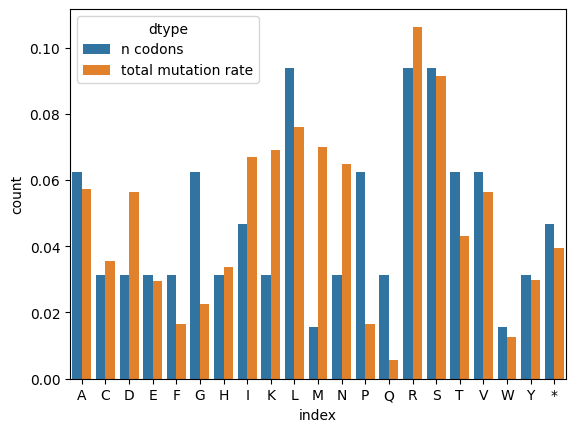

In [130]:
sns.barplot(x='index', y='count', hue='dtype', data=total_df ) 

In [131]:
genetic_code

{'ATA': 'I',
 'ATC': 'I',
 'ATT': 'I',
 'ATG': 'M',
 'ACA': 'T',
 'ACC': 'T',
 'ACG': 'T',
 'ACT': 'T',
 'AAC': 'N',
 'AAT': 'N',
 'AAA': 'K',
 'AAG': 'K',
 'AGC': 'S',
 'AGT': 'S',
 'AGA': 'R',
 'AGG': 'R',
 'CTA': 'L',
 'CTC': 'L',
 'CTG': 'L',
 'CTT': 'L',
 'CCA': 'P',
 'CCC': 'P',
 'CCG': 'P',
 'CCT': 'P',
 'CAC': 'H',
 'CAT': 'H',
 'CAA': 'Q',
 'CAG': 'Q',
 'CGA': 'R',
 'CGC': 'R',
 'CGG': 'R',
 'CGT': 'R',
 'GTA': 'V',
 'GTC': 'V',
 'GTG': 'V',
 'GTT': 'V',
 'GCA': 'A',
 'GCC': 'A',
 'GCG': 'A',
 'GCT': 'A',
 'GAC': 'D',
 'GAT': 'D',
 'GAA': 'E',
 'GAG': 'E',
 'GGA': 'G',
 'GGC': 'G',
 'GGG': 'G',
 'GGT': 'G',
 'TCA': 'S',
 'TCC': 'S',
 'TCG': 'S',
 'TCT': 'S',
 'TTC': 'F',
 'TTT': 'F',
 'TTA': 'L',
 'TTG': 'L',
 'TAC': 'Y',
 'TAT': 'Y',
 'TAA': '*',
 'TAG': '*',
 'TGC': 'C',
 'TGT': 'C',
 'TGA': '*',
 'TGG': 'W'}

Text(0, 0.5, 'total mutation rate')

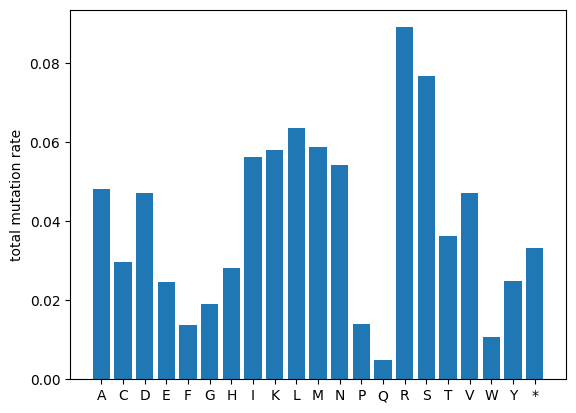

In [76]:
## order
total_occurrence_of_AAs = combined_AA_enrichments_cycles["Mut1"]["mut_enrichment"][1].sum(axis = 1)

plt.bar(total_occurrence_of_AAs.index,total_occurrence_of_AAs)
plt.ylabel("total mutation rate")

In [49]:
genetic_code

{'ATA': 'I',
 'ATC': 'I',
 'ATT': 'I',
 'ATG': 'M',
 'ACA': 'T',
 'ACC': 'T',
 'ACG': 'T',
 'ACT': 'T',
 'AAC': 'N',
 'AAT': 'N',
 'AAA': 'K',
 'AAG': 'K',
 'AGC': 'S',
 'AGT': 'S',
 'AGA': 'R',
 'AGG': 'R',
 'CTA': 'L',
 'CTC': 'L',
 'CTG': 'L',
 'CTT': 'L',
 'CCA': 'P',
 'CCC': 'P',
 'CCG': 'P',
 'CCT': 'P',
 'CAC': 'H',
 'CAT': 'H',
 'CAA': 'Q',
 'CAG': 'Q',
 'CGA': 'R',
 'CGC': 'R',
 'CGG': 'R',
 'CGT': 'R',
 'GTA': 'V',
 'GTC': 'V',
 'GTG': 'V',
 'GTT': 'V',
 'GCA': 'A',
 'GCC': 'A',
 'GCG': 'A',
 'GCT': 'A',
 'GAC': 'D',
 'GAT': 'D',
 'GAA': 'E',
 'GAG': 'E',
 'GGA': 'G',
 'GGC': 'G',
 'GGG': 'G',
 'GGT': 'G',
 'TCA': 'S',
 'TCC': 'S',
 'TCG': 'S',
 'TCT': 'S',
 'TTC': 'F',
 'TTT': 'F',
 'TTA': 'L',
 'TTG': 'L',
 'TAC': 'Y',
 'TAT': 'Y',
 'TAA': '*',
 'TAG': '*',
 'TGC': 'C',
 'TGT': 'C',
 'TGA': '*',
 'TGG': 'W'}

In [40]:
from collections import Counter
Counter(genetic_code.values())

Counter({'S': 6,
         'R': 6,
         'L': 6,
         'T': 4,
         'P': 4,
         'V': 4,
         'A': 4,
         'G': 4,
         'I': 3,
         '*': 3,
         'N': 2,
         'K': 2,
         'H': 2,
         'Q': 2,
         'D': 2,
         'E': 2,
         'F': 2,
         'Y': 2,
         'C': 2,
         'M': 1,
         'W': 1})